<a href="https://colab.research.google.com/github/adityakangune/IT-LP-4-Codes-/blob/main/Chit_1_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chit 1

## **Assignment 2**


### *Name:Aditya Kangune*
### *Roll number: 43321*
### *Batch: P11*

*Problem Statement*:

    Implementing Feedforward neural networks with Keras and TensorFlow for classification of  hand-written MNIST dataset using below steps: 
    a. Import the necessary packages
    b. Load the training and testing data 
    c. Define the network architecture using Keras 
    d. Train the model using SGD with 11 epochs
    e. Evaluate the network  
    f. Plot the training loss and accuracy


## a. Import the necessary packages


In [18]:
import matplotlib.pyplot as plt
import keras

## b. Load the training and testing data 


In [19]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [20]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


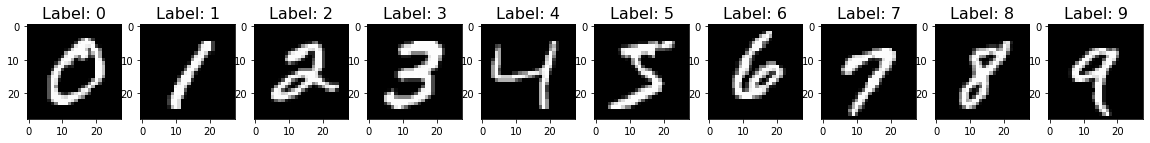

In [21]:
num_classes = 10
f, ax = plt.subplots(1, num_classes, figsize=(20,20))

for i in range(0, num_classes):
  sample = x_train[y_train == i][0]
  ax[i].imshow(sample, cmap='gray')
  ax[i].set_title("Label: {}".format(i), fontsize=16)

In [22]:
for i in range(10):
  print(y_train[i])

5
0
4
1
9
2
1
3
1
4


In [23]:
y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)

In [24]:
for i in range(10):
  print(y_train[i])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [25]:
# Normalize Data
x_train = x_train / 255.0
x_test = x_test / 255.0

In [26]:
# Reshape Data
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)
print(x_train.shape)

(60000, 784)


## c. Define the network architecture using Keras 


In [27]:
from keras.models import Sequential
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout

In [28]:
model = Sequential()

model.add(Dense(units=128, input_shape=(784,), activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=10, activation='softmax'))

# Training the model using SGD
opt = tf.keras.optimizers.SGD(learning_rate=0.1, momentum=0)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


## d. Train the model using SGD with 11 epochs


In [29]:
batch_size = 512
epochs = 11 # As per the problem statement
# epochs = 100

history = model.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=epochs)

Epoch 1/11
118/118 [==============================] - 2s 10ms/step - loss: 0.9434 - accuracy: 0.7281
Epoch 2/11
118/118 [==============================] - 1s 10ms/step - loss: 0.4358 - accuracy: 0.8744
Epoch 3/11
118/118 [==============================] - 1s 10ms/step - loss: 0.3576 - accuracy: 0.8972
Epoch 4/11
118/118 [==============================] - 1s 9ms/step - loss: 0.3123 - accuracy: 0.9100
Epoch 5/11
118/118 [==============================] - 1s 9ms/step - loss: 0.2797 - accuracy: 0.9188
Epoch 6/11
118/118 [==============================] - 1s 9ms/step - loss: 0.2568 - accuracy: 0.9257
Epoch 7/11
118/118 [==============================] - 1s 9ms/step - loss: 0.2388 - accuracy: 0.9321
Epoch 8/11
118/118 [==============================] - 1s 9ms/step - loss: 0.2204 - accuracy: 0.9366
Epoch 9/11
118/118 [==============================] - 1s 10ms/step - loss: 0.2071 - accuracy: 0.9404
Epoch 10/11
118/118 [==============================] - 1s 9ms/step - loss: 0.1962 - accuracy: 0.

## e. Evaluate the network  

In [30]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Loss: {}, Test Accuracy: {}".format(test_loss, test_acc))

313/313 [==============================] - 1s 2ms/step - loss: 0.1490 - accuracy: 0.9541
Test Loss: 0.14903958141803741, Test Accuracy: 0.9541000127792358


In [31]:
# list all data in history
print(history.history.keys())


dict_keys(['loss', 'accuracy'])


## f. Plot the training loss and accuracy

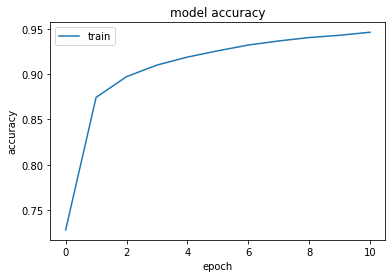

In [32]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


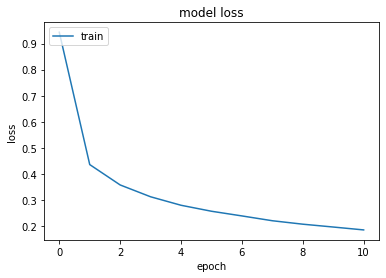

In [33]:
# summarize history for loss
plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()